# Лабораторная работа №3

## Проверка статистических гипотез о виде закона распределения.

#### 1. Cформировать выборку из 200 случайных чисел. Проверить гипотизу о соответствии выборке теоритическому закону распределения по критерию согласия Пирсона.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from statsmodels.distributions.empirical_distribution import ECDF

a = 1
b = 2

def get_sample(n):
    Ei = sts.uniform().rvs(size=n)

    Xi = []
    Yi = []

    for i in range(n):
        Xi.append(Ei[i] * (b - a) + a)
        Yi.append(np.exp(Xi[i]))
    return Yi, n

Построим гистограмму равновероятностным способом, а также теоретическую плотность

Text(0, 0.5, 'f(Y)')

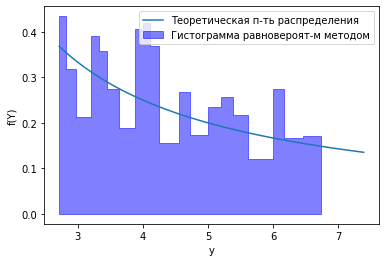

In [2]:
Yi, n = get_sample(200)
M = int(4 * np.log(n))

m = n // M # количество вариант на кажом интервале

Yi.sort()
A = [Yi[0]] # граница A
B = [] # граница B
for i in range(1, M):
    A.append(Yi[i * m])
    B.append(Yi[i * m])
    
B.append(Yi[-1])

delta = [] # Длины интервалов
for i in range(len(A)):
    delta.append(B[i] - A[i])
y = []
x = []
s = A[0]

for i in delta:
    y.append(1 /(M * i))
    x.append(s)
    s += i


plt.fill_between(x, y1=y, y2=[0]*len(y), color='b', step='post', alpha=0.5, label="Гистограмма равновероят-м методом")

x = np.linspace(np.exp(1), np.exp(2), 3000)
py = 1/x
plt.plot(x, py, label='Теоретическая п-ть распределения')

plt.legend(loc='upper right')
plt.xlabel("y")
plt.ylabel("f(Y)")

Выдвинем гипотезу $H_0$, что эмпирическое и теоретическое распределения согласуются и будем проверять ее с помощью $\chi^2$. Пусть вероятность ошибки первого рода равна $\alpha = 0.01$.

In [3]:
# т.к. количество вариант на каждом интервале одинаковое => и теоретическая частота будет одинаковая

table = pd.DataFrame(data={"$A_i$": A, "$B_i$": B, "$d_i$": delta, "$v_i$": [m]*len(delta), "$f_i$": y})
table.style.set_properties(subset=['$v_i$'], **{'width': '5px'})

,$A_i$,$B_i$,$d_i$,$v_i$,$f_i$
0,2.719183,2.828875,0.109692,9,0.434116
1,2.828875,2.978516,0.149641,9,0.318222
2,2.978516,3.202835,0.224320,9,0.212282
3,3.202835,3.324420,0.121585,9,0.391653
4,3.324420,3.457561,0.133141,9,0.357659
5,3.457561,3.631806,0.174245,9,0.273288
6,3.631806,3.884144,0.252338,9,0.188712
7,3.884144,4.001555,0.117411,9,0.405575
8,4.001555,4.115127,0.113572,9,0.419284
9,4.115127,4.243977,0.128849,9,0.369571



Рассчитаем теоретическую вероятность попадания случайной величины в $i$-й интервал при условии, что гипотеза верна.

Необходимые формулы: $p_i=F(B_i)-F(A_i)$; $$ \chi^2 = n\sum_{i=1}^M \frac{(p_i-p_i^*)^2}{p_i}=\sum_{i=1}^M \frac{(\nu_i-np_i)^2}{np_i}$$

In [4]:
p_teor = [] # теоретическая вероятность попадания в i-й интерввал
p_emp = [m / n] * len(A) # частота попаданий в i-й интервал = относительная частота интервала * количество интервалов
FA = []
FB = []

for i in range(len(A)):
    FA.append(np.log(A[i]))
    FB.append(np.log(B[i]))
    p_teor.append(np.log(B[i]) - np.log(A[i]))


HIi = []

for i in range(len(A)):
    HIi.append(n * (p_teor[i] - p_emp[i])**2 / p_teor[i])
        
table2 = pd.DataFrame(data={"$F(A_i)$" : FA, "$F(B_i)$": FB, "$p_i$": p_teor, "$p_i^*$": p_emp, "$\chi_i$": HIi})
table2

,$F(A_i)$,$F(B_i)$,$p_i$,$p_i^*$,$\chi_i$
0,1.000331,1.039879,0.039548,0.045,0.150344
1,1.039879,1.091425,0.051546,0.045,0.166263
2,1.091425,1.164036,0.072611,0.045,2.099910
3,1.164036,1.201295,0.037259,0.045,0.321677
4,1.201295,1.240563,0.039268,0.045,0.167328
5,1.240563,1.289730,0.049167,0.045,0.070620
6,1.289730,1.356903,0.067172,0.045,1.463748
7,1.356903,1.386683,0.029780,0.045,1.555612
8,1.386683,1.414670,0.027987,0.045,2.068489
9,1.414670,1.445501,0.030831,0.045,1.302333


Найдем значение $\chi^2$ и количество степеней свободы:

In [5]:
HI = sum(HIi)
print('Хи-квадрат:' + str(HI))

Хи-квадрат:20.146637191345427


In [6]:
k = M - 1
print('Число степеней свободы:' + str(k))

Число степеней свободы:20


Найдем в таблице значения $\chi_{\alpha,k}$ и $\chi_{1-\alpha,k}$ для полученных $\alpha$ и $k$: $\chi_{0.01, 20}=37.57$ и $\chi_{0.99, 20}=8.26$. Так как $\chi_{0.01, 20}$ &lt; $\chi$ &lt; $\chi_{0.99, 20}$, то нет оснований отвергать гипотезу $H_0$.

#### 2. Cформировать выборку из 30 случайных чисел. Проверить гипотезу о соответствии выборке теоретическому закону распределения по критерию согласия Колмогорова.

In [7]:
Yi, n = get_sample(30)

Yi.sort()
table = pd.DataFrame(data={"Значение": Yi}) # вариационный ряд
table

,Значение
0,2.856860
1,2.914400
2,3.098236
3,3.205955
4,3.487660
5,3.543358
6,3.722392
7,3.874802
8,4.046208
9,4.219423


Построим графики теоретической и эмпирической функций распределения:



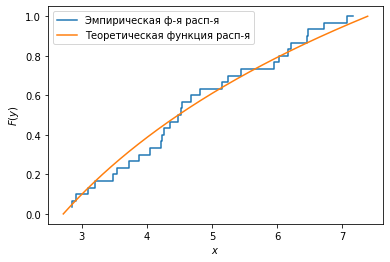

In [8]:
ecdf = ECDF(Yi)
plt.step(ecdf.x, ecdf.y, label='Эмпирическая ф-я расп-я')

x = np.linspace(np.exp(1), np.exp(2), 3000)
y = (np.log(x) - 1)
plt.plot(x, y, label='Теоретическая функция расп-я')
plt.ylabel('$F(y)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Выдвинем гипотезу $H_0$, что эмпирическое и теоретическое распределения согласуются и будем проверять ее с помощью критерия Колмогорова. Пусть вероятность ошибки первого рода равна $\alpha = 0.05$.

Найдем модуль максимальной разности: $d_n = max|F(x_i)-F_n(x_i)| = max(d_n^+,d_n^-)$, где $d_n^+=max|\frac{i}{n}-F(x_i)|, d_n^-=max|\frac{i-1}{n}-F(x_i)|$:

In [9]:
def F(x):
    return (np.log(x) + 1)

dn_plus = []
dn_minus = []

for i in range(n - 1):
    dn_minus.append(abs(i / n - F(Yi[i])))
    dn_plus.append(abs((i + 1) / n - F(Yi[i])))
    #print(F(Y[i]))
    
dn = max(max(dn_minus), max(dn_plus))
print (dn)

2.1396983237508325



Вычислим значение критерия: $\lambda =d \sqrt{n}$:

In [10]:
l = dn * np.sqrt(n)
print(l)

11.719610381743228


Доверительная вероятность равна $\gamma = 1-\alpha = 0.95$. По таблице фукции Колмогорова определяем критическое значение $\lambda$. $\lambda_{\gamma} = 1.36$. Так как $\lambda$ > $\lambda_\gamma$, то гипотеза $H_0$ будет отвергнута.

#### 3. Cформировать выборку из 50 случайных чисел. Проверить гипотезу о соответствии выборке теоретическому закону распределения по критерию согласия Мизеса.

In [11]:
Yi, n = get_sample(50)
Yi.sort()

Выдвинем гипотезу $H_0$, что эмпирическое и теоретическое распределения согласуются и будем проверять ее с помощью критерия Колмогорова. Пусть вероятность ошибки первого рода равна $\alpha = 0.05$.

Построим таблицу с значениями эмпирической функции распределения $F_n(x_i)=\frac{i-0.5}{n}$, значениями теоретической функции распределения $F(x_i)$ и значениями квадрата отклонения $\delta=(F_n(x_i)-F(x_i))^2$:

In [12]:
Fny = [] # эмпирическая функция
F0y = [] # теоретическая функция
delta = [] # квадрат отклонения

for i in range(n):
    Fny.append((i + 0.5) / n) # знак +, т.к. нумерация начинается с нуля
    F0y.append(F(Yi[i]))
    delta.append((Fny[i] - F0y[i])**2)

table = pd.DataFrame(data={"$y$": Yi, "$F_n$": Fny, "$F$": F0y, "$\delta$": delta})
table

,$y$,$F_n$,$F$,$\delta$
0,2.953691,0.01,2.083056,4.297560
1,2.988071,0.03,2.094628,4.262689
2,3.028331,0.05,2.108012,4.235412
3,3.181392,0.07,2.157319,4.356900
4,3.183765,0.09,2.158064,4.276891
5,3.184531,0.11,2.158305,4.195553
6,3.240510,0.13,2.175731,4.185014
7,3.249399,0.15,2.178470,4.114691
8,3.260252,0.17,2.181805,4.047358
9,3.294291,0.19,2.192191,4.008768


Найдем фактическое значение статистики по формуле: $n\sigma^2_n=\frac{1}{12n} + \sum_{i=0}^{n} \delta_i$:

In [13]:
stat = 1 / (12 * n) + sum(delta)
print(stat)

188.81584508111112


Кртитическое значение статистики Мизеса на уровне значимости $\alpha=0.05$ по таблице равно $n\sigma^2_{\alpha}=0.461$. Так как $n\sigma^2_n > n\sigma^2_{\alpha}$, то гипотеза  𝐻0  будет отвергнута